In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MaxNLocator
%matplotlib inline

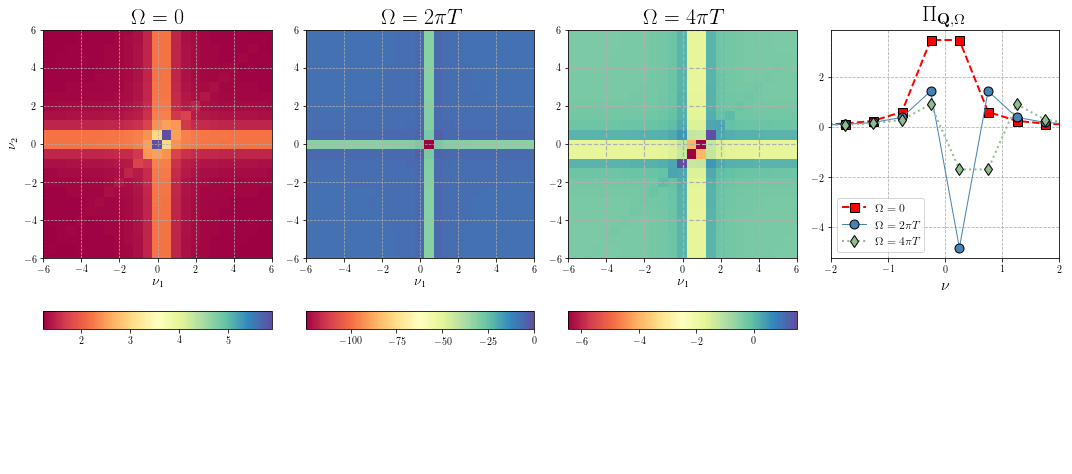

In [5]:
plt.clf()

T = 0.08

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('Spectral')
filenamebolla='../data/PL_chi_nu.txt'
filename0 = '../data/PL_density_0.txt'
filename1 = '../data/PL_density_1.txt'
filename2 = '../data/PL_density_2.txt'

def nfer(iw): return T*np.pi*(2.*iw+1.)

def plotBubble(ax):
    ms = 9.0
    bolla = np.loadtxt('../data/PL_chi_nu.txt')

    ax.plot( nfer(bolla[:,0]), (bolla[:,1])[::-1] , marker ='s', markeredgecolor='black',markersize =ms,color='r', label=r'$\Omega=0$',
        linewidth=2.0, linestyle='dashed')
    ax.plot( nfer(bolla[:,0]), (bolla[:,2])[::-1] , marker ='o', markeredgecolor='black',markersize=ms,color='steelblue', label=r'$\Omega=2\pi T$',
        linewidth=1.0, linestyle='solid')
    ax.plot( nfer(bolla[:,0]), (bolla[:,3])[::-1] , marker= 'd',markeredgecolor= 'black',markersize=ms, color='darkseagreen', label=r'$\Omega=4\pi T$',
        linewidth=2.0, linestyle='dotted')
    ax.axes.grid(linestyle='dashed')
    ax.legend(loc=3,fontsize=12)

    ax.set_xlim([-2,2])

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
    
    ax.set_xlabel(r'$\nu$', fontsize=16)
    #ax.text(-1.,-8.0,r'$\Pi_{\mathbf{Q},\Omega}$',fontsize=22)
    ax.set_title(r'$\Pi_{\mathbf{Q},\Omega}$',fontsize=22)
    
def plotDen(filename,ax,lab, iw, isFirstPlot, gw=0.7):

    density_data = -np.loadtxt(filename)[:]
    fer_grid = np.arange(-density_data.shape[0]/2, density_data.shape[0]/2)
    
    def Den13(nu1,nu3):
        if nu1 in fer_grid and nu3 in fer_grid:
            return density_data[nu1+density_data.shape[0]/2][nu3+density_data.shape[1]/2]
        else:
            return 0.

    def Den12(nu1,nu2):
        return Den13(nu1,nu2-iw)

    #center = matriciona.shape[0]/2
    #print np.shape(matriciona), "min, max: ", np.min(matriciona), np.max(matriciona)
    x = fer_grid#np.arange(-density_data.shape[0]/2, density_data.shape[0]/2)
   
    #data = density_data[:]
    #data = np.array( [[ Den13(nu1,nu3) for nu3 in x ] for nu1 in x])
    data = np.array( [[ Den12(nu1,nu2) for nu2 in x ] for nu1 in x])
    
    im= ax.pcolormesh(nfer(x),nfer(x),data,cmap=cmap ) 
 
    ax.set_xlim([-6,6])
    ax.set_ylim([-6,6])
    ax.grid(linestyle='dashed',linewidth=gw)
    
    ax.set_xlabel(r'$\nu_1$', fontsize=14)
    if isFirstPlot:
        ax.set_ylabel(r'$\nu_2$', fontsize=14)
    ax.set_aspect(1)

    ax.set_title(lab, fontsize=22)
    #ax.text(-13,10.5,lab, fontsize=20)
    return im 

    
fig, ((ax1, ax2, ax3, bb1),(ax4,ax5,ax6, bb2)) = plt.subplots(ncols=4,nrows=2, figsize=(15,6.6))
bb2.axis('off')
im1=plotDen(filename0,ax1,r'$\Omega=0$',0,  True)
im2=plotDen(filename1,ax2,r'$\Omega=2\pi T$',1, False)
im3=plotDen(filename2,ax3,r'$\Omega=4\pi T$',2, False, gw=1.2)

# Plot bubble 
plotBubble(bb1)

ax4.set_aspect(0.08)
ax5.set_aspect(0.08)
ax6.set_aspect(0.08)

cb4 = plt.colorbar(im1,cax=ax4,orientation='horizontal')
cb5 = plt.colorbar(im2,cax=ax5,orientation='horizontal')
cb6 = plt.colorbar(im3,cax=ax6,orientation='horizontal')

for cb in (cb4,cb5,cb6):
    cb.locator = MaxNLocator(5)
    cb.update_ticks()

plt.subplots_adjust(hspace=-1.2)
plt.tight_layout()
#plt.subplots_adjust(bottom=-0.2) 

#plt.subplots_adjust(wspace = 0.04)
plt.savefig('../images//PL_all.png',dpi=300)